# <div align="center"> **How the Beatles' Music Changed Over the Years**
## <div align="center"> A Text Analysis of Beatles Lyrics

### <div align="right"> *By John Cox*

<img src="Beatles_album_covers.jpg" style="width:600px;height:400px"/>

# The Motivation Behind this Analysis

One thing that Beatles' fans agree on is that the Beatles' music changed over the years.  Their earlier music is significantly different from their later music, with a distinction usually drawn at the album 'Revolver'--the first album the Beatles created after their touring years ended.  From Revolver on, the Beatles' music became much more experimental and had large influence over the direction of the music industry.  The Beatles early music, which was immensely popular and brought the band to fame, had a similar style to other popular rock music of the 50's and early 60's.  On the other side, each album in the Beatles later years was unique in that each covered different genres of music --some which were just being invented, and each had its own distinct style.  If you are unfimiliar with the Beatles and want to know a glimpse of what I am talking about, listen to these two songs and guess which one was from the early and late Beatles https://www.youtube.com/watch?v=v1HDt1tknTc and https://www.youtube.com/watch?v=usNsCeOV4GM (hint, the latter is late).  

What I wanted to test in this project is whether there is a noticable difference between early Beatles' lyrics and late Beatles' lyrics.  My inclination is that there is more lyrical complexity in the later Beatles' music, but only the data can reveal the truth.  

What this project is **not** testing is which Beatles music is better or more advanced.  This analysis is staying within the scope of just the lyrics and trends in lyrical complexity over time.  What I am missing in this analysis is data on anything outside of the lyrics.  It would be unfair to say that music is defined solely by its lyrics, much of what people love about music is the melodies, harmonies, and rhythms.  Therefore this project can only answer questions that pertain to the lyrics.


# The Stucture of this Project

For this project I decided the best way to present my findings is through a Jupyter Notebook blog-style post.  This structure allows me to be transparent with the methods I use and makes my analysis easily repeatable.  If you are reading this and want to replicate my findings or add to them, you can reach the full project's repository with this link https://github.com/jcox22/Beatles-Text-Analysis.  The entirety of this analysis is done through Python code.

I broke down this project into five distinct section to help readability:


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   **1) The Dataset.**  This section introduces the dataset that was used for this project and where it was sourced from, along with the data cleaning and manipulation that was needed to perform meaningful analysis.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **2.) Exploring Trends in the Data.**  This section plots and analyzes the variables of interest to test my hypothesis. 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **3.) Are These Trends Unique to the Songwriter?**  This section tests to see if the trends are caused by a specific songwriter --John, Paul, George, or Ringo.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **4.) Comparing the Beatles to Other 60's Bands**  This section compares the results of the Beatles analysis to other rival 60's artists.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  **5.) Trends in Word Usage**  This section looks at trends in specific word usage of Beatles' lyrics over time.


# Part 1: The Dataset


I was able to create a dataset of every single Beatles song that appears in an album for this project. The data contains five columns: Album, Song, Lyrics, Early or Late, and Composer. The first four columns were sourced from the website http://toti.lindberg.zone/beatles/index.asp, which serves as an online database for Beatles' songs and lyrics.  The last column, Composer, was sourced from http://beatlesarchive.net on its "Composer and singer of the Beatles' songs" page.

To begin any Python analysis, you must first install the necessary packages, which are below.

In [142]:
# Installing the necessary packages
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from nltk.probability import FreqDist
import plotly.graph_objects as go
import plotly.express as px
from nltk import pos_tag
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

### Importing the Data

The following code imports the dataset and outputs the first five rows of my dataset.  Seeing the first five rows allows me to make sure the data imported correctly and lets me know what I will be working with for the analysis.

In [143]:
# Importing the dataset
Beatles = pd.read_excel (r"Beatles-Lyrics.xlsx", names=['ALBUM', 'SONG', 'LYRICS', 'EARLY_LATE', 'COMPOSER', 'YEAR'])

# Reading the first 5 rows to see what the data looks like
Beatles.head(5)

,ALBUM,SONG,LYRICS,EARLY_LATE,COMPOSER,YEAR
0,A. Please Please Me,A Taste of Honey,A taste of honey... tasting much sweeter than ...,Early,McCartney,1963
1,A. Please Please Me,Anna (Go To Him),"Anna, You come and ask me, girl, To set you fr...",Early,Lennon,1963
2,A. Please Please Me,Ask Me Why,I love you Can't you tell me things I want to ...,Early,Lennon,1963
3,A. Please Please Me,Baby It's You,Sha la la la la la la la Sha la la la la la la...,Early,Lennon,1963
4,A. Please Please Me,Boys,"I been told when a boy kiss a girl, Take a tri...",Early,Starr,1963


### Cleaning the Data

Because I created this dataset and was able to format the data anyway I liked, there wasn't too much cleaning to be done.  However, I did need to make a few adjustments.  Notably, I needed to confirm that the structure type of the data is correct, and that every character is lowercase so that Python doesn't consider words that are capitolized as different words than their lowercase version.

In [156]:
# Change data types to their appropriate type
Beatles['LYRICS'] = Beatles['LYRICS'].astype("str")

# Make every lyric lowercase
Beatles['LYRICS'] =  Beatles['LYRICS'].str.lower()

### Adding New Features to the Data

With the five columns I have, I am also able to create new columns of data that I will use in my analysis.  Things like 'number of unique words per song', or 'characters per word' can be added as a new column from the existing data.

In [157]:
# Add Character count column
Beatles['CHARACTERS'] = Beatles['LYRICS'].apply(len)

# Add Characters per word column
Beatles['CHARACTER_PER_WORD'] = Beatles.apply(lambda row: len(row.LYRICS)/len(row.LYRICS.split()), axis=1)

# Add Number of Words in song column
Beatles['WORD_COUNT'] = Beatles.apply(lambda row: len(row.LYRICS.split()), axis=1)

# Add number of unique words column
Beatles['UNIQUE'] = Beatles.apply(lambda row: len(set(row.LYRICS.split())), axis = 1)

# Add percent of total words that are unique column
Beatles['PERCENT_UNIQUE'] = (Beatles['UNIQUE']/Beatles['WORD_COUNT'])*100

After I add these new features, I take a quick look at the data to make sure everything went smoothly.

In [158]:
# What the dataset looks like now, first 3 rows
Beatles.head(3)

,ALBUM,SONG,LYRICS,EARLY_LATE,COMPOSER,YEAR,CHARACTERS,CHARACTER_PER_WORD,WORD_COUNT,UNIQUE,PERCENT_UNIQUE
0,A. Please Please Me,A Taste of Honey,a taste of honey... tasting much sweeter than ...,Early,McCartney,1963,491,5.336957,92,48,52.173913
1,A. Please Please Me,Anna (Go To Him),"anna, you come and ask me, girl, to set you fr...",Early,Lennon,1963,663,4.572414,145,68,46.896552
2,A. Please Please Me,Ask Me Why,i love you can't you tell me things i want to ...,Early,Lennon,1963,772,4.678788,165,61,36.969697


Now that I have features that are worth exploring, I am ready to jump in!

# Part 2: Exploring Trends in The Data

### Why I chose these features

An important question to ask when running an analysis is what the data *really* represents, and if there is any bias present.  The main features I am going to center my analysis around are: characters per word, unique words per song, and percent of words in the song that are unique.

I believe each of these features adds value to my analysis in a unique way, and together these features can create robust conclusions.

First, characters per word allows me to robustly analyze the length of words that are chosen to be in each song.  My assumption here is that the longer the word, the more complex it is.  This isn't always true --there are quite a few outliers words, but on average it will be true, which is what is important here.

Second, number of unique words per song allows me to see the amount of amount of writing that went into each song.  The assumption here is that songs with more unique words have more complex lyrics.  Of course, there is some bias in this metric.  This metric is positively correlated to song length, which means longer songs are more likely to have more unique words.  This leads me to the third metric.

Third, percent of words in the song that are unique combats the bias for the second metric.  This metric favors songs that a variety of words and rarely repeat lines.  The assumption here is that songs that repeat the same lines over and over are less complex than those that constantly have new verses.  There is one issue with this metric, and that is the fact that many songs only have a handful of lyrics.  Those songs, such as songs with only one lyric as we will see, can 'hack' this statistic and make it appear they are extremely complex, even though there are barely any words in the song.

While none of these metrics are perfec, together, these three metrics cover a robust ground of complexity.  

### Characters Per Word

The first trend I thought I would look at is the number of characters per word in each song.

I also decided the best way to analyze this is through graphing each song by album in chronological order.  The following code does just that. Each dot on the graph represents a song, and hovering over it will tell you which song it is.  What I am looking for here is to see if there is a significant trend in characters per word over time (with album representing time).

In [159]:
fig = go.Figure(data=go.Scatter(x=Beatles['ALBUM'],
                               y=Beatles['CHARACTER_PER_WORD'],
                               mode='markers',
                               text=Beatles['SONG']))

fig.update_layout(title='Characters Per Word Over Albums')
fig.show()

Just by looking at this graph it is hard to tell if there is a significant trend.  It looks like there *might* be a trend upwards, but it is really hard to tell.  A way to combat this is to seperate the data by early and late instead of by album.  That is what I did with the following code.

In [160]:
fig2 = px.box(Beatles, x='EARLY_LATE', 
              y ='CHARACTER_PER_WORD', 
              points = "all", 
              hover_data=["SONG"])

fig2.update_layout(title='Characters Per Word for Early and Late Songs', title_font_size=20,
                   xaxis_title="Early or Late Beatles' Songs",
                  yaxis_title="Characters per Word")
fig2.show()

From here we see a much clearer view of the trend.  Hovering over the boxplot gives you the average and quartiles for early and late.  From those values, you can see that the median amount of characters per word increased from early (4.74) to late (4.94).  Further, the average for late songs is equivalent to the third quartile of early songs.  That means that only 25% of the early songs have as many characters per word as the average late song does.

### Number of Unique Words

The idea behind this metric is that songs with more complexity will have a broader vocabulary and include more unique words in each song.  However, this metric comes with some biases, as longer songs will more likely have more unique words by the fact that they have more words in total.  Therefore this metric is useful, but not the end-all statistic.  

Again I provide the same two plots as before.  The first separates songs by album in chronological order, and the second separates songs by early or late

In [161]:
fig = go.Figure(data=go.Scatter(x=Beatles['ALBUM'],
                               y=Beatles['UNIQUE'],
                               mode='markers',
                               text=Beatles['SONG']))

fig.update_layout(title='Number Words that are Unique Over Albums', 
                 xaxis_title="Album",
                  yaxis_title="Number of Unique Words")
fig.show()

From this plot it is obvious that there is more variance in the Beatles' later songs, strikingly so in albums like 'The White Album'.

In [162]:
fig2 = px.box(Beatles, x='EARLY_LATE', 
              y ='UNIQUE', 
              points = "all", 
              hover_data=["SONG"])

fig2.update_layout(title='Number of Words that are Unique for Early and Late', 
                  xaxis_title="Early or Late Beatles' Songs",
                  yaxis_title="Number of Unique Words")
fig2.show()

From the graphs we can see a slight trend upward in number of unique words per song (median from 62 to 67) between early and late songs, with a lot more variance in the later songs.  At first this suprised me, I expected a strong trend upward over time.  As I thought about it more though, this result makes a lot of sense.  Later Beatles songs are known for their variety of styles.  They covered genres such as psychedelic rock, folk rock, blues rock, garage rock, pop, merseybeat, and much more.  With a variety of song styles, you would expext to have a large range of lyrics.  Some with little to no lyrics, and some with many lyrics.  Hovering over the songs that are outliers in the late group makes you realize the range the Beatles had.  Another thing to note is the a lot of the Beatles' later songs, particularly on 'The White Album' and on 'Abbey Road', were short, lasting between two and three minutes each.  This can help explain why many of those songs fall towards the bottom of this metric.

### Percent of Words that are Unique

This metric is similar to the last but adjusts for song length.  As it does that though, it creates biases towards very short songs that have almost no lyrics.

In [163]:
fig = go.Figure(data=go.Scatter(x=Beatles['ALBUM'],
                               y=Beatles['PERCENT_UNIQUE'],
                               mode='markers',
                               text=Beatles['SONG']))

fig.update_layout(title='Percent Words that are Unique Over Albums',
                 xaxis_title="Album",
                  yaxis_title="Percent of Words that are Unique")
fig.show()

fig2 = px.box(Beatles, x='EARLY_LATE', 
              y ='PERCENT_UNIQUE', 
              points = "all", 
              hover_data=["SONG"])

fig2.update_layout(title='Percent of Words that are Unique for Early and Late',
                  xaxis_title="Early or Late Beatles' Songs",
                  yaxis_title="Percent of Words that are Unique")
fig2.show()

These two graphs paint a similar picture to the last metric, but with slightly less variance.  This is to be expected, since for the most part song length is now adjusted for.  However, songs like 'Flying' and 'Revolution 9' which have almost no lyrics are now at the top of the list.  This is problematic, because it would be hard to argue that those songs have the most complex lyrics of them all.  However, outlier songs like those should not affect the median, and from the medians of early and late lyrics, it is clear that late lyrics have a higher percent of words that are unique (44% compared to 38%).


### Conclusions from this section

All three of these metrics show a positive trend toward complexity over time.  Therefore, I am concluding that my inclination was correct to say that later Beatles' music has more lyrical complexity, albeit not by as much as I was expecting.  Though none of these metrics are perfect, together all three create a robust analysis that all shows the same result: The Beatles music became more complex (with more variance in complexity as well) over the course of their career.

# Part 3: Are These Trends Unique to Songwriter?

Next I wanted to see if this complexity is caused by just one or two of the Beatles.  For example, many believe John Lennon to be the leader of the Beatles new music, while others like Paul McCartney kept writing 'silly love songs' (quote by John Lennon himself, and also song written by McCartney as backlash to Lennon).  

In this section, I see if the prior trends are unique to the writers of each song.

My first step is to subset the data by songwriter, and then take the averave of each metric over each album for the artists.

In [164]:
# Subsetting the data by songwriter
Paul = Beatles.query('COMPOSER == "McCartney"')
John = Beatles.query('COMPOSER == "Lennon"')
George = Beatles.query('COMPOSER == "Harrison"')
Ringo = Beatles.query('COMPOSER == "Starr"')

# Taking the averages of each metric grouped by album
Paul_Albums = Paul.groupby('ALBUM').mean()
John_Albums = John.groupby('ALBUM').mean()
George_Albums = George.groupby('ALBUM').mean()
Ringo_Albums = Ringo.groupby('ALBUM').mean()

Now that I have that data, I am able to plot it!

### Characters Per Word

In this graph I look at the trends in characters per word by artist over time.  Each line on the graph represents one of the four Beatles, with a key in the upper-righthand corner.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 <a list of 13 Text xticklabel objects>)

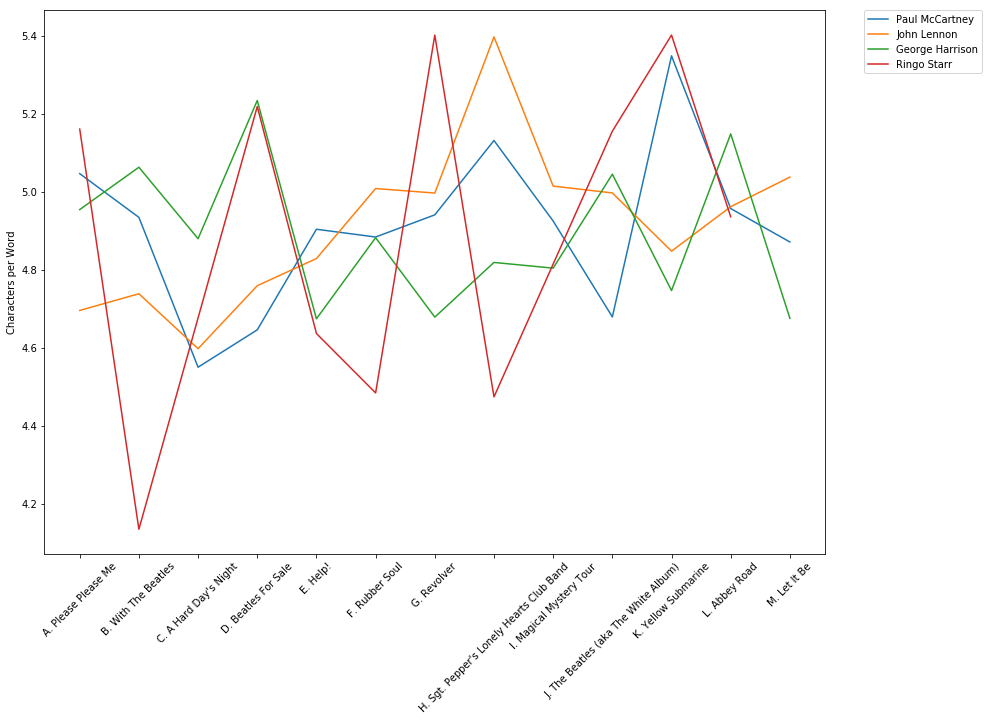

In [167]:
# Creating Plot
plt.figure(figsize=(14,10))
plt.plot(Paul_Albums['CHARACTER_PER_WORD'], label = "Paul McCartney")
plt.plot(John_Albums['CHARACTER_PER_WORD'], label = "John Lennon")
plt.plot(George_Albums['CHARACTER_PER_WORD'], label = "George Harrison")
plt.plot(Ringo_Albums['CHARACTER_PER_WORD'], label = "Ringo Starr")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.ylabel('Characters per Word')
plt.xticks(rotation=45)

Looking at this graph, it is hard see a significant difference between all of the lines.  They all seem to have similar progressions upward over time.  This means for characters per word, all four of the Beatles were collectively responsible for the upward trend.

### Number of Unique Words

Now we can check to see if there is a difference in the number of unique words per song for each Beatle.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 <a list of 13 Text xticklabel objects>)

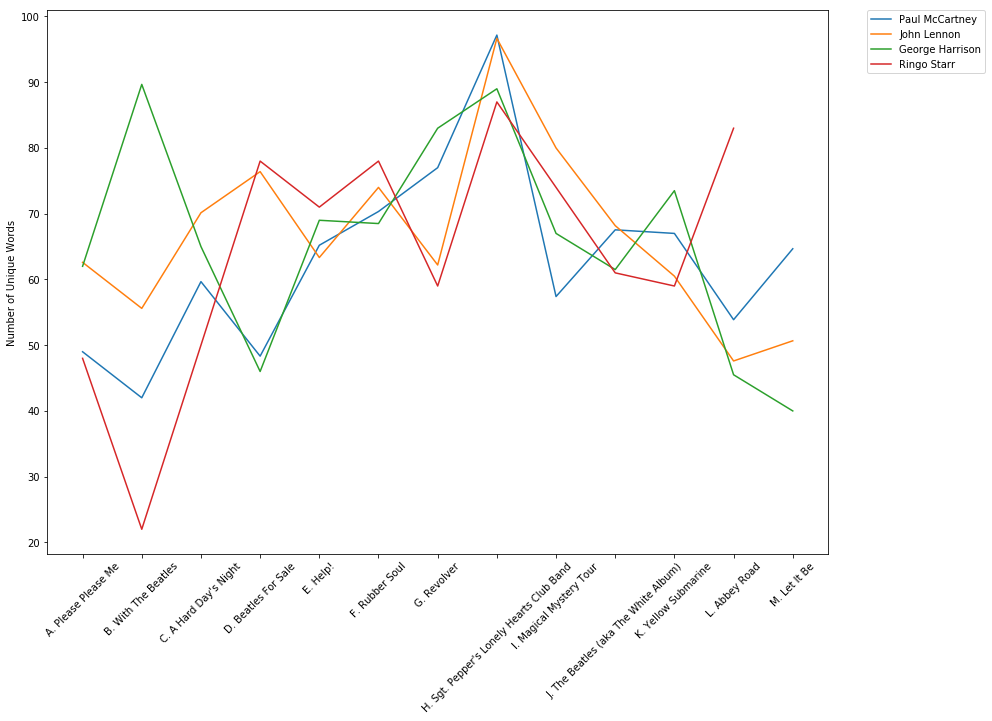

In [170]:
# Plot
plt.figure(figsize=(14,10))
plt.plot(Paul_Albums['UNIQUE'], label = "Paul McCartney")
plt.plot(John_Albums['UNIQUE'], label = "John Lennon")
plt.plot(George_Albums['UNIQUE'], label = "George Harrison")
plt.plot(Ringo_Albums['UNIQUE'], label = "Ringo Starr")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.ylabel('Number of Unique Words')
plt.xticks(rotation=45)

Again all of the Beatles seem to follow the same trend.  This really suprised me!  I would have thought that each artist would have slightly different styles and lyrical ability, but it appears that by this metric they are nearly identical.  Even Ringo Starr followed a similar trend, someone who is known for having less writing ability than the other Beatles.

### Percent of Words that are Unique

Finally, we plot the percent of words per song that are unique.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 <a list of 13 Text xticklabel objects>)

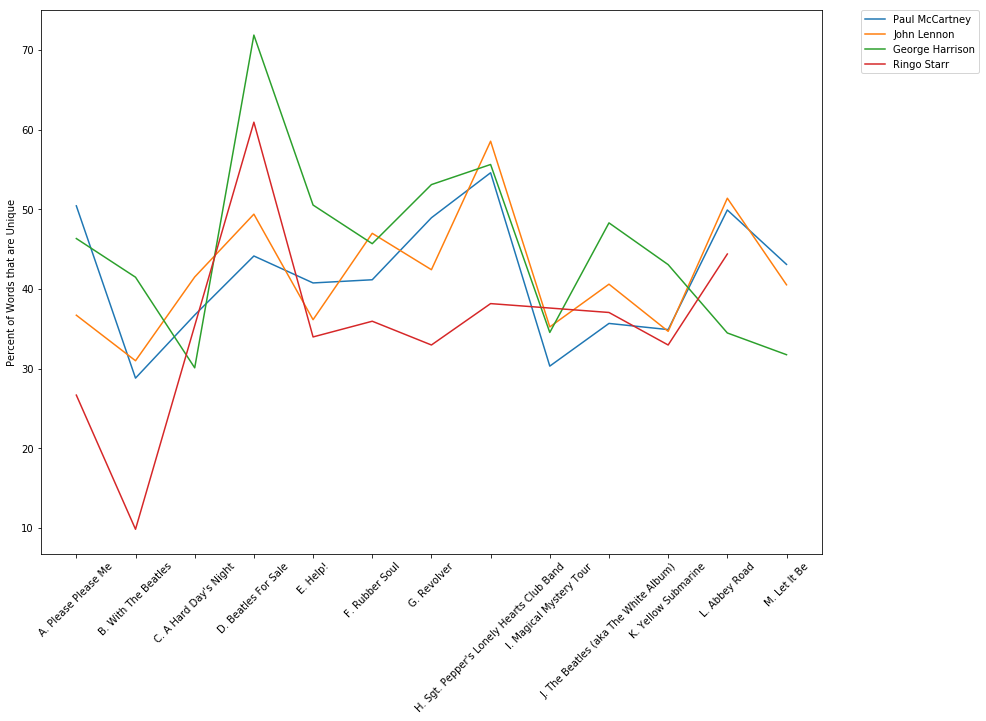

In [169]:
# Plot
plt.figure(figsize=(14,10))
plt.plot(Paul_Albums['PERCENT_UNIQUE'], label = "Paul McCartney")
plt.plot(John_Albums['PERCENT_UNIQUE'], label = "John Lennon")
plt.plot(George_Albums['PERCENT_UNIQUE'], label = "George Harrison")
plt.plot(Ringo_Albums['PERCENT_UNIQUE'], label = "Ringo Starr")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.ylabel('Percent of Words that are Unique')
plt.xticks(rotation=45)

This plot is similar to the last one, all four of the Beatles follow the same trend. I find it interesting that all four seem to peak at the same time, in this case duing the album 'Beatles For Sale'.  This makes me believe that the Beatles were great at collaborating through their songwriting process, and that they each inflounced each other tremendously. 

### Conclusions from this section

All three graphs in this section point to the same thing: No one Beatle is responsible for the trends shown in their lyrics.  ALl four Beatles followed similar trends in their song lyrics over time, likely because of their collaboration on the albums

# Part 4: Comparing the Beatles to Other 60's Bands

These results so far have been interesting, but they all fall within the realm of the Beatles.  If I only analyze the Beatles, I lose the context behind music at the time, which can introduce bias into my conclusions.  Perhaps every artists music trended upwards in complexity in the 60's for example.  If that is true, the Beatles' result is nothing special and can be attributed to the time period.  I also want to know where the Beatles numbers fall compared to other bands.  Are the Beatles' lyrics particularly complex?  Or are they average compared to other bands, or even below average?  These are the types of questions I sought to answer in this section.


### The Artists I Chose to Make Comparisons With

For this analysis, I chose to compare the Beatles' music with that of Bob Dylan and the Beach Boys.  I chose those two artists for a couple of reasons.  First, because they became popular at the same time.  All three groups released their first album within a year of each other and had similar timelines to fame.  Second, all three groups were often compared to each other, with all three bands taking inspiration from each other at some point.  Third, I chose Bob Dylan as an example of a someone who is known to have complex lyrics (he even won a Nobel Prize for his poetic lyrics), while I chose the Beach Boys as a group who is more known for their harmonies than their lyrics.  

### Importing, Cleaning, and Manipulating the Data


For both the Beach Boys and Bob Dylan, I sourced the data from https://www.lyrics.com/, which had records of all of their albums and lyrics over time.  I only used the data for songs that were released in the 60's.  Both the Beach Boys and Bob Dylan had albums released past that point, but to keep the comparisons fair, I only used songs on the same timeline as the Beatles.  


Just like in part 1, I need to make some changes to the data before I can analyze it.  I use very similar code as I used before to do this.  

In [171]:
# Import the data
Beach_Boys = pd.read_excel(r"Beach-Boys-Lyrics.xlsx", names=['ALBUM', 'SONG', 'LYRICS', 'YEAR'])
Bob_Dylan = pd.read_excel(r"Bob-Dylan-Lyrics.xlsx", names=['ALBUM', 'SONG', 'LYRICS', 'YEAR'])

In [172]:
# Clean the new data
Beach_Boys['LYRICS'] = Beach_Boys['LYRICS'].astype("str")
Bob_Dylan['LYRICS'] =  Bob_Dylan['LYRICS'].str.lower()

In [173]:
# Add Features
# Beach Boys
Beach_Boys['CHARACTERS'] = Beach_Boys['LYRICS'].apply(len)
Beach_Boys['CHARACTER_PER_WORD'] = Beach_Boys.apply(lambda row: len(row.LYRICS)/len(row.LYRICS.split()), axis=1)
Beach_Boys['WORD_COUNT'] = Beach_Boys.apply(lambda row: len(row.LYRICS.split()), axis=1)
Beach_Boys['UNIQUE'] = Beach_Boys.apply(lambda row: len(set(row.LYRICS.split())), axis = 1)
Beach_Boys['PERCENT_UNIQUE'] = (Beach_Boys['UNIQUE']/Beach_Boys['WORD_COUNT'])*100

# Bob Dylan
Bob_Dylan['CHARACTERS'] = Bob_Dylan['LYRICS'].apply(len)
Bob_Dylan['CHARACTER_PER_WORD'] = Bob_Dylan.apply(lambda row: len(row.LYRICS)/len(row.LYRICS.split()), axis=1)
Bob_Dylan['WORD_COUNT'] = Bob_Dylan.apply(lambda row: len(row.LYRICS.split()), axis=1)
Bob_Dylan['UNIQUE'] = Bob_Dylan.apply(lambda row: len(set(row.LYRICS.split())), axis = 1)
Bob_Dylan['PERCENT_UNIQUE'] = (Bob_Dylan['UNIQUE']/Bob_Dylan['WORD_COUNT'])*100

In [174]:
# Find averages for the features by year
Beatles_Years = Beatles.groupby('YEAR').mean()
Beach_Boys_Years = Beach_Boys.groupby('YEAR').mean()
Bob_Dylan_Years = Bob_Dylan.groupby('YEAR').mean()

### Characters Per Word

First I take a look at characters per word again.  Instead of plotting by album, I am plotting by the year each song was released so that there is a common timeline amoung groups.  Each line represents a music group, with the key in the upper-righthand corner.

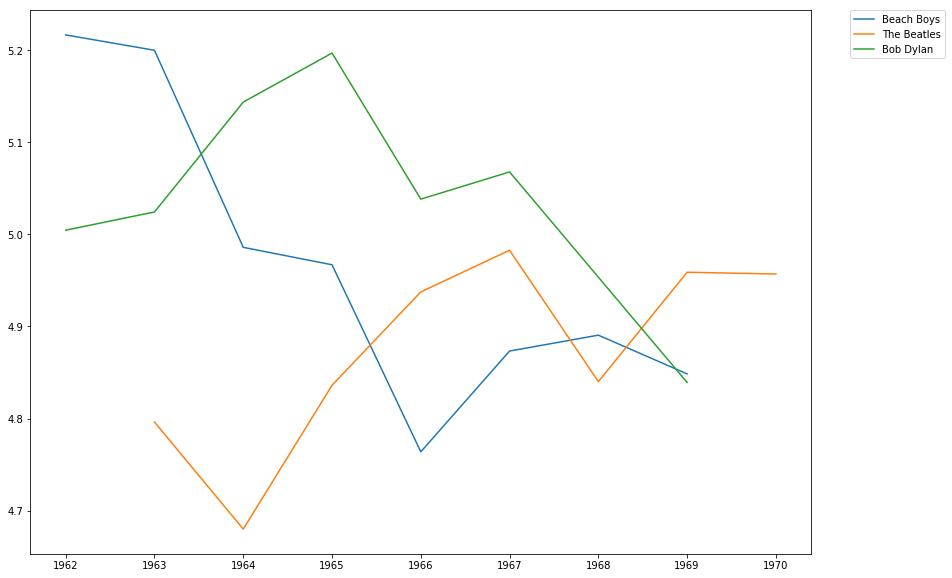

In [24]:
plt.figure(figsize=(14,10))
plt.plot(Beach_Boys_Years['CHARACTER_PER_WORD'], label = "Beach Boys")
plt.plot(Beatles_Years['CHARACTER_PER_WORD'], label = "The Beatles")
plt.plot(Bob_Dylan_Years['CHARACTER_PER_WORD'], label = "Bob Dylan")
plt.ylabel('Characters per Word')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

It is apparent in this graph that the Beatles' trend upward over time isn't a product of the times.  In this graph they are the only group to have an upward slope, and they start as the lowest group and finish as the highest.  I was expecting Bob Dylan to be at top of this graph, and for the most part my expectation was correct.  I was suprised to see the Beach Boys so far up top at the beginning, yet they followed a strong trend downward over time.  

### Number of Unique Words

Now I wanted to look at the number of unique words per song over time for each of the bands.

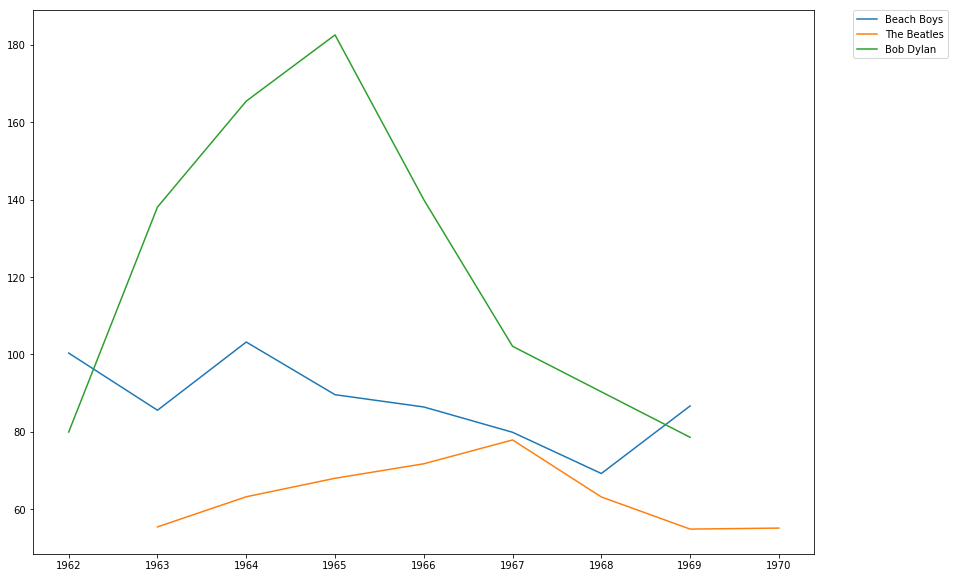

In [25]:
plt.figure(figsize=(14,10))
plt.plot(Beach_Boys_Years['UNIQUE'], label = "Beach Boys")
plt.plot(Beatles_Years['UNIQUE'], label = "The Beatles")
plt.plot(Bob_Dylan_Years['UNIQUE'], label = "Bob Dylan")
plt.ylabel('Number of Unique Words')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

As expected, Bob Dylan's music had by far the most unique words per song, signiling that his lyrics were quite complex at the time.  I was suprised to see the Beatles at the bottom of this group for the entirety of their career, even below the Beach Boys.  One possible explanation is that the Beatles songs are shorter than the others, but that might be a stretch of an argument.  Overall, the Beatles' music just doesn't have as many unique words per song as other music groups.

### Percent of Words that are Unique

To test if song length is really making a difference in number of unique words, we can test it by looking at the percent of words that are unique.  

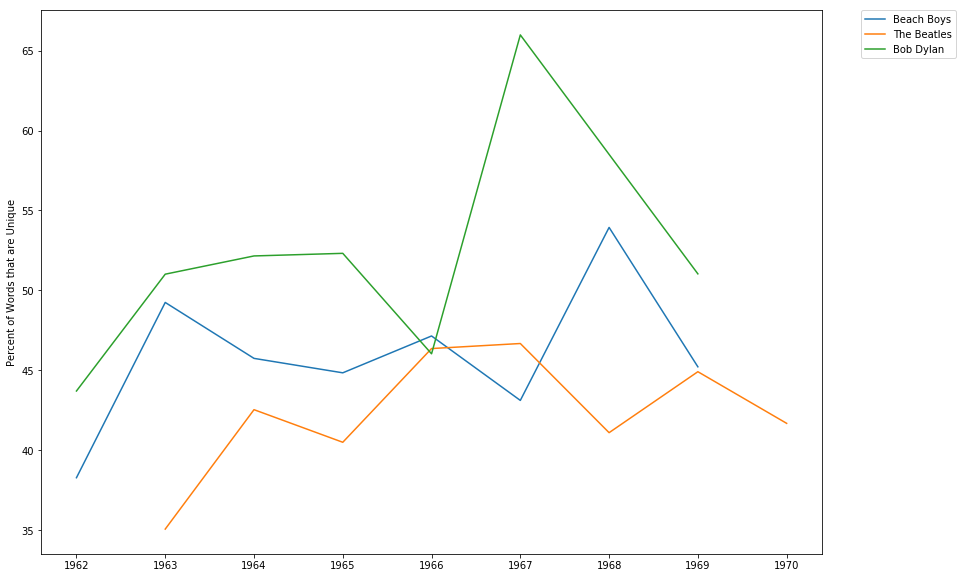

In [175]:
plt.figure(figsize=(14,10))
plt.plot(Beach_Boys_Years['PERCENT_UNIQUE'], label = "Beach Boys")
plt.plot(Beatles_Years['PERCENT_UNIQUE'], label = "The Beatles")
plt.plot(Bob_Dylan_Years['PERCENT_UNIQUE'], label = "Bob Dylan")
plt.ylabel('Percent of Words that are Unique')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

Even after controlling for song length, the Beatles still come in last for this metric, although it is closer than before.  All three bands had a upward sloping trend in percent of words that are unique per song during the 60's, which is interesting.  Perhaps this is evidence that popular music at the time was becoming more complex in nature during the 60's.  

I have also realized that this trend could be explained without dealing with the time period at all.  Maybe bands tend to increase their lyric complexity over time naturally as they become more experienced in their career.  Adding another band from a different time period could help test this theory.

### Word Count

After seeing results above, I became curious to see the word count of the songs of each artist and how much of an affect that had on the results.  

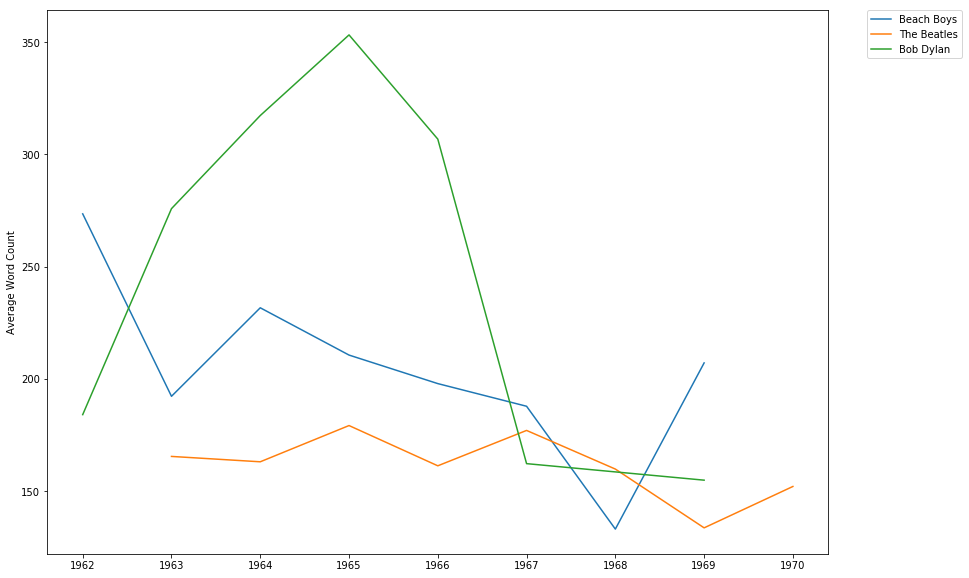

In [176]:
plt.figure(figsize=(14,10))
plt.plot(Beach_Boys_Years['WORD_COUNT'], label = "Beach Boys")
plt.plot(Beatles_Years['WORD_COUNT'], label = "The Beatles")
plt.plot(Bob_Dylan_Years['WORD_COUNT'], label = "Bob Dylan")
plt.ylabel('Average Word Count')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

As we can see the word counts of the artists differed greatly in the early 60's, but became more similar by the end.  All three bands decreased their average word count over time.

### Conclusions from this section

This section gives mixed conclusions about whether the trends the Beatles' had were unique to themselves.  When it comes to characters per word, the Beatles are the only band of these three to have an increase over time.  However, all three bands had an increase in percent of words that are unique over time, countering the first claim.  

I was suprised to see that the Beatles' lyrics were less complex than the Beach Boys by some of these metrics, as they are not particularly known for having complex lyrics.  It is possible that the Beach Boys are more complex than I have previously given them credit for, and it is also possible that my metrics are flawed in a way.

Although these comparisons are interesting, I need to note that I only tested the Beatles against two other bands, which may not be representative of music as a whole at the time.  It is possible that the two bands I chose are outliers and do not follow the trends of most music groups at the time. 

# Part 5: Trends in Word Usage

In this final section, I wanted to look at changes in specific words and themes in the Beatles music over time.  I was curious if there were actual differences in the tyes of words being used in early or late Beatles songs.

To do this, I needed to create Python strings of all the Beatles' early and late music. I did this by writing a function that loops over my dataframe and adds the contents of each row to a string. 

In [177]:
# Separate data by early and late
Early = Beatles.query('EARLY_LATE == "Early"')
Late = Beatles.query('EARLY_LATE == "Late"')


# This functiom takes in a column of lyrics and outputs one long string of lyrics
def corpus(series):
    words = ""                                                                                                                                                                               
    for song in series:
            words += song
    return words

# Long strings of lyrics
Late_Lyrics = corpus(Late['LYRICS']).lower()

Early_Lyrics = corpus(Early['LYRICS']).lower()

### Word Clouds

I thought a great way to easily see the contents of the Beatles early and late lyrics is by creating a word cloud for each.  This allows me to see the most frequently used words in each time period.  

Before running this code, I expected early Beatles' lyrics to be filled with words that are common in pop music, like 'love', or 'girl'.  I expected the later Beatles' music to still have these words, but less frequently.  It was hard for me to think of a common theme for later Beatles' music since each song is so different, but because of this I thought the later Beatles' lyrics would show more variety in the most commonly used words.

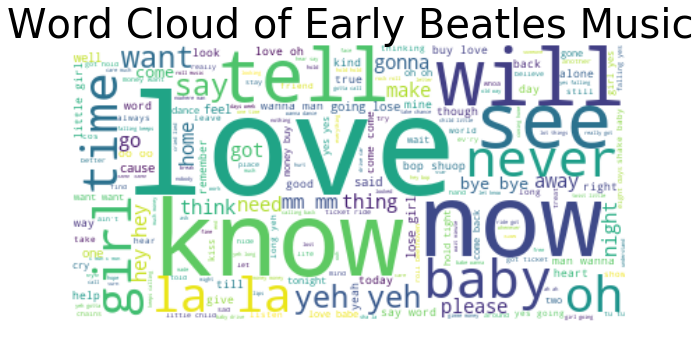

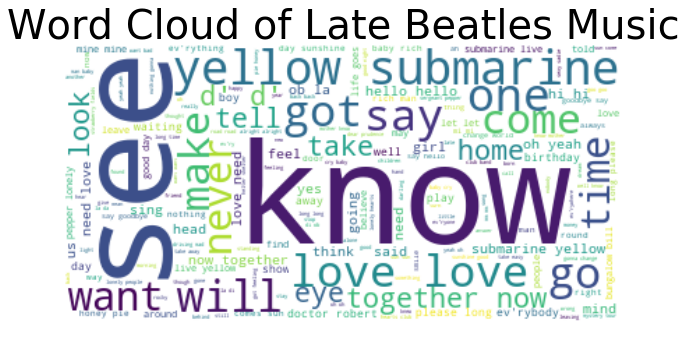

In [135]:
wordcloud_early = WordCloud(max_font_size = 100, background_color = "white").generate(Early_Lyrics)

# Display the generated image:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud_early, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud of Early Beatles Music', fontsize=40)
plt.show()

wordcloud_late = WordCloud(max_font_size = 100, background_color = "white").generate(Late_Lyrics)

# Display the generated image:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud_late, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud of Late Beatles Music', fontsize=40)
plt.show()

### Topic Modeling

Using this data, I was able to run topic models for both early and late Beatles lyrics.  However, the results of said topic models were sporatic, likely caused by lack of sufficient data to perform the test.  Therefore, I left the topic models out of the final version of this project, but I encourage anyone who is interested in learning about topic models to follow this link for how I made them https://stackabuse.com/python-for-nlp-topic-modeling/.

### Trends in Specific Word Usage

The word clouds paint a picture of common words in early and late lyrics, but fail to show how trends in word usage changed over each album.

I decided I would pick some specificly chosen words that show theme and graph their average usage over each album.  The words I chose are 'love', 'girl', and 'know'.  I chose 'love' and 'girl' because they represented themes that early Beatles' music is known for, love songs about girls.  I chose 'know' because it was the most common word used in the late Beatles' music, and it represents a different theme, certainty.

In [189]:
# Prepare data for analysis, add these new features
Beatles['LOVE'] = Beatles.apply(lambda row: row.LYRICS.split().count('love'), axis = 1)
Beatles['GIRL'] = Beatles.apply(lambda row: row.LYRICS.split().count('girl'), axis = 1)
Beatles['KNOW'] = Beatles.apply(lambda row: row.LYRICS.split().count('know'), axis = 1)

In [190]:
# take the means
Albums = Beatles.groupby('ALBUM').mean()

In [193]:
# prepare data for plot
Albums_plot = Albums.reset_index().melt(id_vars=['ALBUM'], value_vars=['LOVE', 'GIRL', 'KNOW'])

In [199]:
fig = px.line(Albums_plot, x="ALBUM", y="value", color = "variable",  title='Specified Words Over Time')
fig.update_layout(xaxis_title="Album",
                  yaxis_title="Word Frequency per Song") 
fig.show()

The trends with 'love' and 'girl' are negative over time, which makes sense given that most of the Beatles' love songs are in their first couple albums.  However, they still creating love longs in their later years, and there is a large spike in the word love for the album 'Yellow Submarine' likely due to the presence of the song 'All You Need Is Love'.  

The trend for know is unclear, it looks to not quite have a negative or positive slope.  That the Beatles didn't change their usage of the word too much over time.  This is interesting because it represents the most commonly used word in late Beatles' lyrics, yet it was used the same amount in early lyrics.  What this tells me is that later lyrics had a larger variety of common words, so much so that a word that barely top 5 in usage in early Beatles would be the most commonly used late Beatles word.

# Conclusions

This analysis taught me a lot about the Beatles' music.  While my prediction of their music becoming more complex over time appears true according to my metrics, I was wrong to think that people like John Lennon were the driving force behind that trend, or to think that the Beatles were just as complex as an artist like Bob Dylan.  As far as themes in their music go, much is unclear, and what is clear (a fall in 'love' songs) isn't very strong.

I hope music fans and data analysts alike find this project interesting and can inspire more similar projects in the future.